## Practical activity: Convert, clean, and analyse data

Focus on the six continents on the table, and perform several calculations for each of them.

## 1. Import the libraries

In [1]:
# Import necessary libraries.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
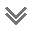

In [2]:
# Create a URL variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Create a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# View the output.
print(soup.prettify())

## 3. Extract tabular data

In [3]:
# Extracting the contents of the table with the table id: 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the output.
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [4]:
# Now we need to specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column.
rows = table.find_all('tr', attrs={'style': ""})

# View the output.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>695,939,792</td>
 <td

In [5]:
# Storage for the extracted data.
# Create an empty list.
output = []

# Specify the column names.
column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# View the output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '695,939,792',
  'Total Deaths': '+2,333',
  'New Deaths': '6,921,077',
  'Total Recovered': '+11',
  'New Recovered': '667,898,269',
  'Active Cases': '+4,159',
  'Serious, Critical': '21,120,446',
  'Tot Cases/ 1M pop': '38,062',
  'Deaths/ 1M pop': '89,283',
  'Total Tests': '887.9',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '108,706,444',
  'Total Deaths': '',
  'New Deaths': '1,176,771                                ',
  'Total Recovered': '',
  'New Recovered': '106,445,689',
  'Active Cases': '',
  'Serious, Critical': '1,083,984',
  'Tot Cases/ 1M pop': '1,548',
  'Deaths/ 1M pop': '324,686',
  'Total Tests': '3,515',
  'Tests/ 1M pop': '1,186,198,602',
  'Population': '3,542,951'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '44,998,701',
  'Total Deaths': '',
  'New Deaths': '531,930                                ',
  'Total Re

## 5. Convert extracted data into a Panda DataFrame

In [6]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"695,939,792","+2,333","6,921,077",+11,"667,898,269","+4,159","21,120,446","38,062","89,283",887.9,,
1,1,USA,"108,706,444",,"1,176,771",,"106,445,689",,"1,083,984","1,548","324,686","3,515","1,186,198,602","3,542,951"
2,2,India,"44,998,701",,"531,930",,"44,466,194",,577,N/A,"31,990",378,"930,797,975","661,721"
3,4,Germany,"38,491,696",,"176,058",,"38,240,600",,"75,038",N/A,"458,870","2,099","122,332,384","1,458,359"
4,5,Brazil,"37,796,956",,"705,775",,"36,249,161",,"842,020",N/A,"175,511","3,277","63,776,166","296,146"


## 6. Convert, clean and analyse the data

In [7]:
# Save the DataFrame as a CSV file without index.
data.to_csv('cases.csv', index=False)

In [8]:
# Create a JSON file.
import json

# Create a JSON file.
output_json = json.dumps(output)

# View the output.
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "695,939,792", "Total Deaths": "+2,333", "New Deaths": "6,921,077", "Total Recovered": "+11", "New Recovered": "667,898,269", "Active Cases": "+4,159", "Serious, Critical": "21,120,446", "Tot Cases/ 1M pop": "38,062", "Deaths/ 1M pop": "89,283", "Total Tests": "887.9", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "108,706,444", "Total Deaths": "", "New Deaths": "1,176,771                                ", "Total Recovered": "", "New Recovered": "106,445,689", "Active Cases": "", "Serious, Critical": "1,083,984", "Tot Cases/ 1M pop": "1,548", "Deaths/ 1M pop": "324,686", "Total Tests": "3,515", "Tests/ 1M pop": "1,186,198,602", "Population": "3,542,951"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "44,998,701", "Total Deaths": "", "New Deaths": "531,930                                ", "Total Recovered": "", "New Recovered": "44,466,194", "Active Cases": ""

In [9]:
# Save the JSON file to .json.
with open('cases_json.json', 'w') as f:
    json.dump(output, f)

In [10]:
# Read the JSON using Pandas, output to .csv.
pd.read_json(output_json).to_csv('cases_csv.csv', index=False)

In [11]:
# Import and read the CSV file.
data_csv = pd.read_csv('cases_csv.csv')

# View the data.
print(data_csv.head())

# Import and read the JSON file.
data_json = pd.read_json('cases_json.json')

# View the DataFrame. 
data_json.head()

   Country,Other Total Cases    New Cases Total Deaths  \
0            NaN       World  695,939,792       +2,333   
1            1.0         USA  108,706,444          NaN   
2            2.0       India   44,998,701          NaN   
3            4.0     Germany   38,491,696          NaN   
4            5.0      Brazil   37,796,956          NaN   

                                  New Deaths  Total Recovered New Recovered  \
0                                  6,921,077             11.0   667,898,269   
1  1,176,771                                              NaN   106,445,689   
2    531,930                                              NaN    44,466,194   
3    176,058                                              NaN    38,240,600   
4    705,775                                              NaN    36,249,161   

  Active Cases Serious, Critical Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  \
0       +4,159        21,120,446            38,062         89,283       887.9   
1          NaN

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"695,939,792","+2,333","6,921,077",+11,"667,898,269","+4,159","21,120,446","38,062","89,283",887.9,,
1,1,USA,"108,706,444",,"1,176,771",,"106,445,689",,"1,083,984","1,548","324,686","3,515","1,186,198,602","3,542,951"
2,2,India,"44,998,701",,"531,930",,"44,466,194",,577,N/A,"31,990",378,"930,797,975","661,721"
3,4,Germany,"38,491,696",,"176,058",,"38,240,600",,"75,038",N/A,"458,870","2,099","122,332,384","1,458,359"
4,5,Brazil,"37,796,956",,"705,775",,"36,249,161",,"842,020",N/A,"175,511","3,277","63,776,166","296,146"


In [12]:
# View the CSV and JSON DataFrames.
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered      float64
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

In [13]:
# Create a subset.
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

# View the column names.
print(data_report.columns)
data_report

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')


,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,NaN,World,"+2,333",11.0,"+4,159","21,120,446"
1,1.0,USA,NaN,NaN,NaN,"1,083,984"
2,2.0,India,NaN,NaN,NaN,577
3,4.0,Germany,NaN,NaN,NaN,"75,038"
4,5.0,Brazil,NaN,NaN,NaN,"842,020"
...,...,...,...,...,...,...
202,222.0,Saint Helena,NaN,NaN,NaN,"2,164"
203,224.0,Montserrat,NaN,NaN,NaN,19
204,227.0,Tokelau,NaN,NaN,NaN,80
205,231.0,China,NaN,NaN,NaN,"118,977"


In [14]:
# Determine missing values.
data_report.isnull().sum()

Country,Other          2
Total Cases            0
Total Deaths         196
Total Recovered      202
Active Cases         196
Serious, Critical     20
dtype: int64

In [15]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('cases_report.csv', index=False)

In [16]:
# View the saved CSV.
cases_report = pd.read_csv('cases_report.csv')

# View the DataFrame.
cases_report.head()

,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,NaN,World,"+2,333",11.0,"+4,159","21,120,446"
1,1.0,USA,NaN,NaN,NaN,"1,083,984"
2,2.0,India,NaN,NaN,NaN,577
3,4.0,Germany,NaN,NaN,NaN,"75,038"
4,5.0,Brazil,NaN,NaN,NaN,"842,020"
